In [1]:
from astropy.convolution import *
import sys
import os
sys.path.append(os.path.abspath('..'))
%matplotlib notebook
# utils=os.path.abspath('..')
from utils import *
import time
from KBs import *


global log
log = []

In [2]:
(HTML(tog))


In [2]:
# convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);

def csv2dat(fname):
    import csv 
    import numpy as np
    global log
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t')
        for row in (spamreader):
            dat+=[row];

    log = log + ['Used \''+fname+'\' as input '];


    return (np.array(dat));

# if not 'input_rulestr' in locals():
#     input_rulestr='000000000060031c61c67f86a0';
# input_rulestr
# CA_sys

In [9]:
def measure_temperature(sys0=None,hdist=None,*args,**kwargs):
#     varargin = measure_temperature.varargin
#     nargin = measure_temperature.nargin
    sysX=copy.copy(sys0)
    jmax=sysX.N;
    avi=sysX.rdf()
    siz=avi.shape
    siz=(sysX.hmax,)+siz;
    tmp=np.zeros(siz)
    smtmp=np.zeros(siz)

    avc=avi
    i=0
    fir=np.reshape(2 ** (np.arange(0,9)),[1,3,3])
    trans=6
    mtp=0
    stp=0
    while i+1 < sysX.hmax:

        i=i + 1
        avcnew=(sysX.adv(avc,i))
        cavc=convolve_int(avc,fir,'wrap').astype(np.int);
        cavcnew=convolve_int(avcnew,fir,'wrap').astype(np.int);
        idx=np.ravel_multi_index((cavc,cavcnew),[2**9,2**9]);
        tmp[i,:,:,:]=np.expand_dims(hdist.flat[idx],0)
        if i >= trans:
            smtmpnow=np.mean(tmp[i - trans:i,:,:,:],axis=0)
            smtmp[i - trans,:,:,:]=smtmpnow
            if i >= trans + 10:
                mtp=np.mean(smtmpnow.flat)
                stpmat=((smtmp[i - trans,:,:,:] - smtmp[i - trans - trans,:,:,:]))
                a=np.mean(np.abs(stpmat.flat))
                b=abs(np.mean(stpmat.flat))
                stp=a - b
                stp1=np.mean(avcnew.flat)
                stp1=min(stp1,1 - stp1)
        avc=avcnew;
        #     im1=[avc(1,:,:)];
        if mtp < 0.02 and i > 20:
            break
    
    fam_alias=sys0.familyname+'_'+sys0.alias;
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:55
    # s=sprintf('%s\\t%s\\t%d\\t%f\\t%f\\t%f\\n',fam_alias,num2str(sys0.od),i,mtp,stp,stp1)
    s='{}\t{}\t{:d}\t{:f}\t{:f}\t{:f}\n'.format(fam_alias,sysX.rulestr,i,mtp,stp,stp1)
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:56
    return s
    
# if __name__ == '__main__':
#     pass
    


In [10]:
def profile(input_list, log = []):
    # global log
    output_data=[];    
    repeat=2;
    # input_list=[input_rulestr];
    ipt_list=input_list*repeat;
    # for i in range(5):
    l_ipt=len(input_list)
    log += ['Log of the process:'];
    logs='Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat);
    log += [logs];
    # print('Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat))

    for num,rulestr in enumerate(ipt_list):
        ca1=CA_sys(familyname,rulestr,[400,100,400]);
        ca1.rulestr2alias();
        s=measure_temperature(ca1,hdist);
        output_data+=[s];
    #     print('{:d} of {:d}'.format(num,len(ipt_list)))
        logs =('{:d} of {:d} '.format(num,len(ipt_list)));
        log += [logs];
        
    temp_data=[];
    # sample_data=[]
    for line in output_data:
        temp_data+=[line.rstrip('\n').split('\t')];
    sample_data=np.array(temp_data)
    # print('data is succesfully generated at {:d} replicates'.format(repeat))
    logs=('data is succesfully generated at {:d} replicates'.format(repeat))

    log  += [logs];

    # print('\n Detail of the input:')
    logs='\n Detail of the input:';
    log+=[logs];
    for k,v in ca1.__dict__.items():
        if not callable(v):
    #         print(k+str(v).ljust(-10))
    #         print("{:5} {:<15} {:<10}".format('',k, str(v)))

            logs=("{:5} {:<15} {:<10}".format('',k, str(v)));
            log+=[logs];
    return( [sample_data,log]);

In [4]:
# #test
# ca1=CA_sys('2dntca',input_rulestr,[600,100,400]);
# ca1.rulestr2alias();
# s=measure_temperature(ca1,hdist);
# output_data=[];
from os import environ
# global log
# log=[];
if 'query' not in locals():
    query = environ.get('query');
    
print query
if not query==None:        
    query = environ['query'];
    if query[-4:]=='.csv':
        query_type = 'csv';
    else:
        query_type = 'rulestr';
#             familyname, input_rulestr = query.split('_');
else:
#     familynam
    query='2dntca_000000000060031c61c67f86a0';
    query_type = 'rulestr'
#         familyname, input_rulestr = query.split('_');
    log+=['fail to fetch query, using default rule, B3/S23 \n' +
    'example query:'+query];
    ## Using B3/S23 as example

if query_type == 'csv':
#     sample_dat, log = 
    sample_data=csv2dat('../calc_temp_data/'+query);
    print('data loaded')
if query_type == 'rulestr':
    familyname, input_rulestr = query.split('_');
    sample_data,log = profile([input_rulestr],log)
    log+=['data generated for '+query];

None


In [11]:
input_rulestr = '000000000060031c61c67f86a0'
sample_data,log = profile([input_rulestr],log)
    

In [ ]:
input_list = ['2dntca_000000000060031c61c67f86a0']

In [12]:
sample_data

array([['2dntca_b3aceijknqrys3aceijknqry2aceikn',
        '000000000060031c61c67f86a0', '21', '0.000000', '0.000000',
        '0.000000'],
       ['2dntca_b3aceijknqrys3aceijknqry2aceikn',
        '000000000060031c61c67f86a0', '21', '0.000000', '0.000000',
        '0.000000']],
      dtype='|S38')

In [16]:
from astropy.convolution import convolve
convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);


In [17]:
    input_list = ['000000000060031c61c67f86a0']
    # global log
    output_data=[];    
    repeat=2;
    # input_list=[input_rulestr];
    ipt_list=input_list*repeat;
    # for i in range(5):
    l_ipt=len(input_list)
    log += ['Log of the process:'];
    logs='Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat);
    log += [logs];
    # print('Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat))

    for num,rulestr in enumerate(ipt_list):
        ca1=CA_sys(familyname,rulestr,[400,100,400]);
        ca1.rulestr2alias();
        s=measure_temperature(ca1,hdist);
        output_data+=[s];
    #     print('{:d} of {:d}'.format(num,len(ipt_list)))
        logs =('{:d} of {:d} '.format(num,len(ipt_list)));
        log += [logs];
    temp_data=[];
    # sample_data=[]
    for line in output_data:
        temp_data+=[line.rstrip('\n').split('\t')];
    sample_data=np.array(temp_data)
    # print('data is succesfully generated at {:d} replicates'.format(repeat))
    logs=('data is succesfully generated at {:d} replicates'.format(repeat))

    log  += [logs];

    # print('\n Detail of the input:')
    logs='\n Detail of the input:';
    log+=[logs];
    for k,v in ca1.__dict__.items():
        if not callable(v):
    #         print(k+str(v).ljust(-10))
    #         print("{:5} {:<15} {:<10}".format('',k, str(v)))

            logs=("{:5} {:<15} {:<10}".format('',k, str(v)));
            log+=[logs];
    print sample_data
#     return( [sample_data,log]);


[['2dntca_b3aceijknqrys3aceijknqry2aceikn' '000000000060031c61c67f86a0'
  '21' '0.000000' '0.000000' '0.000000']
 ['2dntca_b3aceijknqrys3aceijknqry2aceikn' '000000000060031c61c67f86a0'
  '21' '0.000000' '0.000000' '0.000000']]


In [40]:
from astropy.convolution import convolve
convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);

def make_adv(rulestr):
    ruleprj=np.array( 
        list(hex2bin(rulestr,102)[::-1]),
        np.int);
    #         ruleprj=np.array(list(hex2bin(rulestr,102)[::-1]));
    fir=(2**np.arange(0,9)).reshape([1,3,3]);
    pj=rca2ntca;
    def adv(a,horizon):
        return ruleprj[pj[convolve_int(a,fir,'wrap').astype(np.int)]]
    # adv=lambda a, horizon: ruleprj[pj[convolve_int(a,fir,'wrap').astype(np.int)]]
    return adv 
tadv = make_adv('000000000060031c61c67f86a0')

In [42]:
ruleprj

NameError: name 'ruleprj' is not defined

In [1]:
# %load_ext autoreload
# %autoreload
import KBs
kb = KBs.kb_2dntca()
kb.alias2rulestr("B2ce4-cint67e8/S14567")

'1ff7dbe3ff9040e08e10806050'

In [55]:
import scipy.ndimage
convolve_int=lambda a,fir,method:scipy.ndimage.filters.convolve(a,fir,mode = method)
# from astropy.convolution import convolve
# convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);

avc=sysX.rdf().astype(np.int)

convolve_int(avc[0:1,:,:],(2**np.arange(0,9)).reshape([1,3,3]),'wrap').astype(np.int)

array([[[217, 506, 444, 304,  32,   9,  82, 164, 265,  91, 246, 429, 274,
          36,  73, 155, 374, 229, 386, 332],
        [204, 465, 482, 389, 258,  76, 145, 290,  76, 217, 435, 367, 151,
         294,  76, 216, 433, 299,  23, 102],
        [100, 137, 274,  45,  19, 103, 142, 277,  98, 204, 409, 379, 191,
         310, 100, 193, 394, 349, 187, 310],
        [293,  75, 151, 367, 159, 318, 117, 170, 276,  97, 202, 476, 505,
         434, 293,  10,  84, 232, 473, 434],
        [303,  94, 189, 379, 254, 501, 426, 340, 160, 264,  81, 227, 463,
         407, 302,  84, 160, 320, 201, 403],
        [378, 244, 488, 473, 499, 431, 342, 165, 259,  70, 141, 282, 125,
         186, 373, 162, 260,   0,  72, 153],
        [467, 423, 326, 204, 408, 377, 178, 301,  27,  54, 109, 211, 495,
         471, 431, 278,  36,   0,  64, 201],
        [152, 313,  50, 100, 193, 458, 405, 363, 223, 439, 366, 156, 376,
         184, 376, 176, 288,   0,   0,  72],
        [196, 456, 401, 290,  13,  83, 174, 348,

<IPython.core.display.Javascript object>


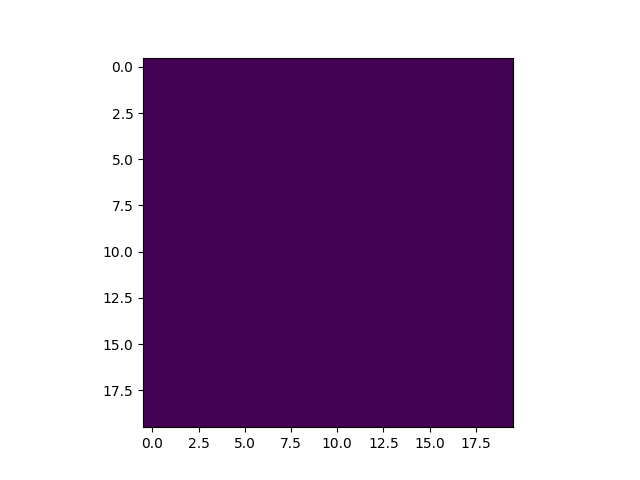

In [41]:
%matplotlib notebook
avc=sysX.rdf()
avc=(tadv(avc,i))
# avc 
plt.imshow(avc[0,:,:])

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# def main():
#     plt.axis([-50,50,0,10000])
#     plt.ion()
#     plt.show()

#     x = np.arange(-50, 51)
#     for pow in range(1,5):   # plot x^1, x^2, ..., x^4
#         y = [Xi**pow for Xi in x]
#         plt.plot(x, y)
#         plt.draw()
#         plt.pause(0.001)
#         input("Press [enter] to continue.")

plt.axis([-50,50,0,10000])
plt.ion()
plt.show()
sysX = ca1
if __name__ == '__main__':
#     main()
    i = 0
    while i+1 < sysX.hmax:
        i=i + 1
        avc=(sysX.adv(avc,i))
        plt.imshow(avc[0,:,:])
#         plt.show()
        plt.draw()
#         plt.pause(0.001)
    
    


In [1]:
# hdist

In [19]:
# def measure_temperature(sys0=None,hdist=None,*args,**kwargs):
sys0 = ca1
hdist = hdist
if 1:
    #     varargin = measure_temperature.varargin
#     nargin = measure_temperature.nargin
    sysX=copy.copy(sys0)
    jmax=sysX.N;
    avi=sysX.rdf()
    siz=avi.shape
    siz=(sysX.hmax,)+siz;
    tmp=np.zeros(siz)
    smtmp=np.zeros(siz)

    avc=avi
    i=0
    fir=np.reshape(2 ** (np.arange(0,9)),[1,3,3])
    trans=6
    mtp=0
    stp=0
    while i+1 < sysX.hmax:

        i=i + 1
        avcnew=(sysX.adv(avc,i))
        cavc=convolve_int(avc,fir,'wrap').astype(np.int);
        cavcnew=convolve_int(avcnew,fir,'wrap').astype(np.int);
        idx=np.ravel_multi_index((cavc,cavcnew),[2**9,2**9]);
        tmp[i,:,:,:]=np.expand_dims(hdist.flat[idx],0)
        if i >= trans:
            smtmpnow=np.mean(tmp[i - trans:i,:,:,:],axis=0)
            smtmp[i - trans,:,:,:]=smtmpnow
            if i >= trans + 10:
                mtp=np.mean(smtmpnow.flat)
                stpmat=((smtmp[i - trans,:,:,:] - smtmp[i - trans - trans,:,:,:]))
                a=np.mean(np.abs(stpmat.flat))
                b=abs(np.mean(stpmat.flat))
                stp=a - b
                stp1=np.mean(avcnew.flat)
                stp1=min(stp1,1 - stp1)
        avc=avcnew;
        #     im1=[avc(1,:,:)];
        if mtp < 0.02 and i > 20:
            break
    
    fam_alias=sys0.familyname+'_'+sys0.alias;
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:55
    # s=sprintf('%s\\t%s\\t%d\\t%f\\t%f\\t%f\\n',fam_alias,num2str(sys0.od),i,mtp,stp,stp1)
    s='{}\t{}\t{:d}\t{:f}\t{:f}\t{:f}\n'.format(fam_alias,sysX.rulestr,i,mtp,stp,stp1)
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:56
#     return s
    
# if __name__ == '__main__':
#     pass
    


In [6]:
# import numpy as np

# # TEST sample_data
# sample_data=np.array([['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148772', '0.087523',
#         '0.089563'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.152794', '0.086693',
#         '0.091644'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148733', '0.089657',
#         '0.089387'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.150105', '0.092000',
#         '0.090981'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.153150', '0.089772',
#         '0.090938']], 
#       dtype='<U46')

## Landscape of the dynamics
* Each point represent a single Cellular Automata. The position of the point indicates the characteristic of its dynamics. The red patch on the right indicates the disordered cluster, whereas the yellow patch on the lower-left indicate the ordered cluster. Anything outside represents some intermediate behaviour. 
* The green patch indicates complex dynamics of particular interest.
* Hover on the point to display the rule-string of a single point. Click to display the rulestring as a copyable string, and open a simulator in a new pop-up window. (The simulator is provided by lv-plugin.js at http://lazyslug.no-ip.biz/lifeview/plugin/js/)
* Click on the bottom-left widgets to Zoom-and-pan

In [7]:
viewer='''<script src="lv-plugin.js"></script>\n
<meta name="LifeViewer" content="viewer textarea 60 hide">\n
<div class="viewer" id="viewer"><textarea id="textarea">bob!</textarea><br><canvas id="cv1" width="480" height="480"></canvas></div>\n''';
# HTML(viewer)

In [8]:
%%html
<script>
String.prototype.formatUnicorn = String.prototype.formatUnicorn ||
function () {
    "use strict";
    var str = this.toString();
    if (arguments.length) {
        var t = typeof arguments[0];
        var key;
        var args = ("string" === t || "number" === t) ?
            Array.prototype.slice.call(arguments)
            : arguments[0];

        for (key in args) {
            str = str.replace(new RegExp("\\{" + key + "\\}", "gi"), args[key]);
        }
    }

    return str;
};

var s= new String("");
var soup=new String("3bo4b11o2b2ob2o2bobo$obobo2bo3bobo3bo2bob3ob2o$2b3obobob6o3b5o2bo2bo$bob2o3b2ob2ob3o4bo5bob2o$2o3b3o3bob4ob2o4bobob2o$5bo4bo4b2obo3b3o2bo$o2bob3obob4o4b3obob2obobo$3bo4bob5o5b3ob2o2b2o$2b3obob2ob4o2bo3bobo3bo$bo4bob2ob6obo3bo4bob2o$5b4obo3bo4bo5bo2bo$ob2obobo2bob2o2bobo2bo2b2o4bo$obo2b2ob2o2b2o3bo2b2obobob4o$6ob2ob2o3b2ob4obo3bob2o$3ob3obo2b3ob4ob4o5bo$obobo7bo3b2o6b3o3bo$bob3o6bob2ob2o3b4obob2o$o2b2o2bo2bo2bobob7ob2o3bo$2obo2bo2b5ob2obo3b2o4b2o$b2o2bob5obo2b5o2bob4o$2o2b4ob2ob4obo3bob3obo2bo$b2o3bo2bo3b6o2bo3bo2bo$bobo3b2ob2o3b3obo3bo5bo$o4b8obobobobob2ob2ob2o$3obo3b4obo3bob3obobo$o3b2obobob2o2b2o5bob2o$6bo5bob2o3b2obo2b2obo$7bo2b2obo2bobobo3bobo2b2o$2o4b7o4bo2b2ob2o3bo$o2bo3bobo3b4o2bo3b2obobo!");
var rule="b3s23578";
var template="x = 300, y = 300, rule = {0} \n {1}";
var div_template="<textarea>{0}</textarea><br><canvas width=\"480\" height=\"480\" tabindex=\"1\"></canvas>";

//s=template.formatUnicorn("B3/S23","bbboooobbbboo!");
//var s="<textarea>x = 300, y = 300, rule = B3/S238 \nbobbbbbbooooooo!</textarea><br><canvas width=\"480\" height=\"480\"></canvas>";
//alert(s)
var s = template.formatUnicorn(rule,soup)
//document.getElementById("viewer").innerHTML = s;
</script>





In [ ]:
### Plotting sample_data

%matplotlib inline

# mpld3.enable_notebook()
from graphics import *
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
#                                        ,projection='3d'
                                      ))
fig.set_size_inches([6,6])

ax.grid(color='white', linestyle='solid')
ax.set_ylim(-.1,0.38)
ax.set_xlim(0,1)

fig2,ax2=plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
                                       ,projection='3d'
                                      ))
fig2.set_size_inches([10,10])
# fig2.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.3)

ax2.grid(color='white', linestyle='solid')
ax2.set_ylim(-.1,0.38)
ax2.set_xlim(0,1)

fig,ax,fig2,ax2 = make_figure((fig,ax,fig2,ax2),sample_data)
fig.set_size_inches([7,7])
ax.set_ylim(-.1,0.38)
ax.set_xlim(0,1)

# display(HTML(viewer))



mpld3.display(fig)
# mpld3.display(fig2)





In [10]:
# len(KBs.henseldict)
# len(KBs.rca2ntca)
# KBs.henseldict[:51]
from KBs import *
import itertools
import collections
if 1:
        OUT = ''
        rulestr =  '000000000060031c61c67f86a0'
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for i,x in enumerate(r) if x=='1'];
#         print r
        lst = [henseldict[i] for i in rule]
        lst.sort()
        
        #### group by B/S
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
#         d = {'b':{},'s':{}}   ### set default
        d.update(
            {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[0])}        
        )
        for k,lst in d.iteritems():
            d[k] = {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[1])}
            
        for bs, dd in d.iteritems():
            OUT += bs
            for k,lst in dd.iteritems():
                OUT += k + ''.join( conf[-1] for conf in lst)
        OUT = OUT.replace('_','')
        alias = OUT
#         return OUT
print OUT
# t

b3aceijknqrys3aceijknqry2aceikn


In [11]:
import numpy as np

sum(float(x)>0.3 for x in list(sample_data[:,3]))/sample_data.shape[0]

0

In [12]:
# len(ntca_list)
# .shape
# print(tst_data)
print('\n'.join(log));

Log of the process:
Starting to profile 1 rules at 2 replicates,
 totaling 2 instances
0 of 2 
1 of 2 
data is succesfully generated at 2 replicates

 Detail of the input:
      hmax            100       
      siz             (400, 20, 20)
      familyname      2dntca    
      rulestr         184af6a375706e604132428008
      N               400       
      alias           b3kqr2a5eijk4ikty7c6acn8s3eijky2a5cejknq4jnwyz7ce6ack
      dimsiz          [400, 100, 400]
data generated for 2dntca_184af6a375706e604132428008


In [13]:
# from nbconvert import HTMLExporter
# import codecs
# import nbformat
# exporter = HTMLExporter()
# # execfile()
# output_notebook = nbformat.read('calc_temp.ipynb', as_version=4)
# output, resources = exporter.from_notebook_node(output_notebook)
# codecs.open('test.html', 'w', encoding='utf-8').write(output)